# **이미지 데이터 셋을 이용한 CNN Modeling**

> # **Google Drive Mount**

## **Dogs and Cats Image_Data**

- Train_Data : 2000(1000_Dogs, 1000_Cats)
- Valid_Data : 1000(500_Dogs, 500_Cats)
- Test_Data : 1000(500_Dogs, 500_Cats)

In [1]:
import warnings
warnings.filterwarnings('ignore')

## **Import Tensorflow & Keras**

- import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.5.0'

- GPU 설정 확인

In [3]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Fri Aug  6 08:39:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    65W / 149W |    122MiB / 11441MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

# **I. Google Drive Mount**

- 'dogs_and_cats_small.zip' 디렉토리를 구글 드라이브에 업로드

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 마운트 결과 확인

In [5]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar 31 15:05 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


# **II. Data Preprocessing**

> ## **1) Unzip 'dogs_and_cats_small.zip'**

In [6]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
replace test/cats/cat.1501.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflati

In [7]:
!ls -l

total 20
drwx------ 5 root root 4096 Aug  6 08:26 drive
drwxr-xr-x 1 root root 4096 Jul 16 13:20 sample_data
drwxr-xr-x 4 root root 4096 Aug  6 08:26 test
drwxr-xr-x 4 root root 4096 Aug  6 08:26 train
drwxr-xr-x 4 root root 4096 Aug  6 08:26 validation


> ## **2) Image_File Directory Setting**
- train_dir
- valid_dir
- test_dir

In [8]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

> ## **3) ImageDataGenerator() & flow_from_directory()**

- Normalization
  - ImageDataGenerator()
- Resizing & Generator
  - flow_from_directory()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),   # 모든 이미지의 크기를 동일하게
                                                    batch_size=20,
                                                    class_mode='binary')      # 2개의 디렉토리(dogs, cats)

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


> ## **4) Test train_generator**

In [10]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기 :', data_batch.shape)
  print('배치 레이블 크기 :', labels_batch.shape)
  break

배치 데이터 크기 : (20, 150, 150, 3)
배치 레이블 크기 : (20,)


In [11]:
labels_batch

array([1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0.], dtype=float32)

# **III. CNN Keras Modeling**

> ## **1) Model Define**

- Feature Extraction & Classification

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

> ## **2) Model Compile**

- 모델 학습 방법 설정

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

> ## **3) Model Fit**

- 모델 학습 수행
   - 약 10분

In [15]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch=100,   # Train 데이터가 2000개이고, batch_size가 20이므로
                       epochs=60,
                       validation_data=valid_generator,
                       validation_steps=50)   # Validation 데이터가 1000개이고, batch_size가 20이므로

Epoch 1/60
100/100 [==============================] - 14s 113ms/step - loss: 0.6948 - accuracy: 0.5155 - val_loss: 0.6888 - val_accuracy: 0.5010
Epoch 2/60
100/100 [==============================] - 11s 112ms/step - loss: 0.6903 - accuracy: 0.5335 - val_loss: 0.6818 - val_accuracy: 0.5290
Epoch 3/60
100/100 [==============================] - 11s 112ms/step - loss: 0.6620 - accuracy: 0.6015 - val_loss: 0.6372 - val_accuracy: 0.6290
Epoch 4/60
100/100 [==============================] - 11s 111ms/step - loss: 0.6344 - accuracy: 0.6505 - val_loss: 0.6348 - val_accuracy: 0.6530
Epoch 5/60
100/100 [==============================] - 11s 112ms/step - loss: 0.5824 - accuracy: 0.6825 - val_loss: 0.6162 - val_accuracy: 0.6470
Epoch 6/60
100/100 [==============================] - 11s 112ms/step - loss: 0.5270 - accuracy: 0.7360 - val_loss: 0.6115 - val_accuracy: 0.6670
Epoch 7/60
100/100 [==============================] - 11s 111ms/step - loss: 0.4601 - accuracy: 0.7810 - val_loss: 0.7171 - val_ac

> ## **4) 학습 결과 시각화**

- Loss Visualization

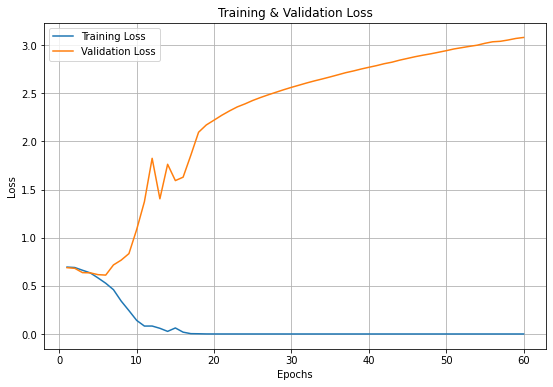

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

- Accuracy Visualization

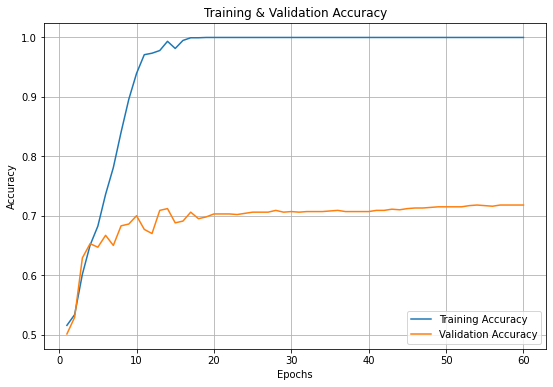

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## **5) Model Evaluate**

- test_generator

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


- Loss & Accuracy

In [19]:
loss, accuracy = model.evaluate(test_generator,
                                steps=50)         # Test 데이터가 1000개이고, batch_size가 20이므로

50/50 [==============================] - 3s 67ms/step - loss: 3.0615 - accuracy: 0.6970


# **IV. Model Save & Load to Google Drive**

> ## **1) Google Drive Mount**

In [20]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> ## **2) Model Save**

In [21]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [22]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 81088
-rw------- 1 root root    34600 Aug  4 10:21 001_Model_iris.h5
-rw------- 1 root root 41498696 Aug  6 09:09 002_dogs_and_cats_small.h5
-rw------- 1 root root 41499544 Aug  6 08:20 003_dogs_and_cats_augmentation.h5


> ## **3) Model Load**

In [23]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [24]:
loss, accuracy = model_small.evaluate(test_generator,
                                      steps=50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 68ms/step - loss: 3.0615 - accuracy: 0.6970
Loss = 3.06155
Accuracy = 0.69700
